<a href="https://colab.research.google.com/github/Shrason/Projects/blob/main/Data_Cleaning_using_Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('/content/Data-cleaning-for-beginners-using-pandas.csv')
df.head()

,Index,Age,Salary,Rating,Location,Established,Easy Apply
0,0,44.0,$44k-$99k,5.4,"India,In",1999,TRUE
1,1,66.0,$55k-$66k,3.5,"New York,Ny",2002,TRUE
2,2,NaN,$77k-$89k,-1.0,"New York,Ny",-1,-1
3,3,64.0,$44k-$99k,4.4,India In,1988,-1
4,4,25.0,$44k-$99k,6.4,Australia Aus,2002,-1


In [ ]:
df.columns = df.columns.str.lower().str.replace(' ','_')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29 entries, 0 to 28
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   index        29 non-null     int64  
 1   age          22 non-null     float64
 2   salary       29 non-null     object 
 3   rating       28 non-null     float64
 4   location     29 non-null     object 
 5   established  29 non-null     int64  
 6   easy_apply   29 non-null     object 
dtypes: float64(2), int64(2), object(3)
memory usage: 1.7+ KB


Checking for Missing values

In [ ]:
df.isnull().sum()

index          0
age            7
salary         0
rating         1
location       0
established    0
easy_apply     0
dtype: int64

- As out of 28 rows 7 are nan values in Age column, dropping will lead to 25% data loss.
- Using averaging method may not reflect the true underlying pattern or relationship of the data because data has a wide range.
- Thus, mode method will help filling null values with more common values.

In [ ]:
df['age'] = df['age'].fillna(df['age'].mode()[0])

In [ ]:
df['age']

0     44.0
1     66.0
2     44.0
3     64.0
4     25.0
5     44.0
6     21.0
7     44.0
8     35.0
9     22.0
10    55.0
11    44.0
12    44.0
13    25.0
14    66.0
15    44.0
16    19.0
17    44.0
18    35.0
19    32.0
20    44.0
21    35.0
22    19.0
23    44.0
24    13.0
25    55.0
26    44.0
27    52.0
28    44.0
Name: age, dtype: float64

In [ ]:
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])
df['rating']

0     5.4
1     3.5
2    -1.0
3     4.4
4     6.4
5     1.4
6     0.0
7    -1.0
8     5.4
9     7.7
10    5.4
11    6.7
12    0.0
13   -1.0
14    4.0
15    3.0
16    4.5
17    5.3
18    6.7
19    3.3
20    5.7
21    5.0
22    7.8
23    2.4
24   -1.0
25    0.0
26   -1.0
27    5.4
28    3.4
Name: rating, dtype: float64

In [ ]:
rating_avg = df['rating'].mean()
df['rating'] = df['rating'].replace(-1,rating_avg)
df['rating'] = df['rating'].round(2)
df['rating']

0     5.40
1     3.50
2     3.37
3     4.40
4     6.40
5     1.40
6     0.00
7     3.37
8     5.40
9     7.70
10    5.40
11    6.70
12    0.00
13    3.37
14    4.00
15    3.00
16    4.50
17    5.30
18    6.70
19    3.30
20    5.70
21    5.00
22    7.80
23    2.40
24    3.37
25    0.00
26    3.37
27    5.40
28    3.40
Name: rating, dtype: float64

Salary Column Formating

In [ ]:
set(df['salary'])

{'$10k-$49k',
 '$19k-$40k',
 '$39k-$88k',
 '$44k-$99k',
 '$55k-$66k',
 '$77k-$89k',
 '$88k-$101k'}

In [ ]:
df['salary'] = df['salary'].str.replace('$', '').str.replace(r'k', '000')
df['salary']

<ipython-input-201-4f491f03579d>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['salary'] = df['salary'].str.replace('$', '').str.replace(r'k', '000')


0      44000-99000
1      55000-66000
2      77000-89000
3      44000-99000
4      44000-99000
5      77000-89000
6      44000-99000
7      44000-99000
8      44000-99000
9      44000-99000
10     10000-49000
11     10000-49000
12     44000-99000
13     44000-99000
14     44000-99000
15    88000-101000
16     19000-40000
17     44000-99000
18     44000-99000
19     44000-99000
20     44000-99000
21     44000-99000
22     55000-66000
23     44000-99000
24     44000-99000
25     44000-99000
26     55000-66000
27     44000-99000
28     39000-88000
Name: salary, dtype: object

Location Stadardization

In [ ]:
set(df['location'])

{'Australia Aus', 'India In', 'India,In', 'New York,Ny'}

In [ ]:
replacements = {',': '', ' Aus': '', ' In': '', ' Ny': ''}
df['location'] = df['location'].replace(replacements, regex = True)
df['location']

0        IndiaIn
1     New YorkNy
2     New YorkNy
3          India
4      Australia
5        IndiaIn
6     New YorkNy
7      Australia
8     New YorkNy
9        IndiaIn
10       IndiaIn
11       IndiaIn
12       IndiaIn
13     Australia
14     Australia
15     Australia
16       IndiaIn
17    New YorkNy
18    New YorkNy
19    New YorkNy
20    New YorkNy
21    New YorkNy
22    New YorkNy
23    New YorkNy
24    New YorkNy
25     Australia
26       IndiaIn
27       IndiaIn
28     Australia
Name: location, dtype: object

In [ ]:
 df['location'] = df['location'].replace('IndiaIn', 'India')
 df['location'] = df['location'].replace('New YorkNy', 'New York')
 df['location']


0         India
1      New York
2      New York
3         India
4     Australia
5         India
6      New York
7     Australia
8      New York
9         India
10        India
11        India
12        India
13    Australia
14    Australia
15    Australia
16        India
17     New York
18     New York
19     New York
20     New York
21     New York
22     New York
23     New York
24     New York
25    Australia
26        India
27        India
28    Australia
Name: location, dtype: object

Established Column

In [ ]:
(df["established"].value_counts()[-1])

5

In [ ]:
df['established'] = df['established'].replace(-1,'Null')
df['established']

0     1999
1     2002
2     Null
3     1988
4     2002
5     1999
6     Null
7     Null
8     Null
9     Null
10    2008
11    2009
12    1999
13    2019
14    2020
15    1999
16    1984
17    1943
18    1954
19    1955
20    1944
21    1946
22    1988
23    1999
24    1987
25    1980
26    1934
27    1935
28    1932
Name: established, dtype: object

Easy Apply Indicator

In [ ]:
df['easy_apply'] = df['easy_apply'].map(lambda x: 'True' if x == 'TRUE' else 'False')


In [ ]:
df['easy_apply']

0      True
1      True
2     False
3     False
4     False
5      True
6     False
7     False
8     False
9      True
10     True
11    False
12    False
13     True
14     True
15    False
16    False
17     True
18     True
19     True
20     True
21    False
22     True
23     True
24    False
25     True
26     True
27    False
28    False
Name: easy_apply, dtype: object

Rating range

In [ ]:
set(df['rating'])

{0.0,
 1.4,
 2.4,
 3.0,
 3.3,
 3.37,
 3.4,
 3.5,
 4.0,
 4.4,
 4.5,
 5.0,
 5.3,
 5.4,
 5.7,
 6.4,
 6.7,
 7.7,
 7.8}

In [ ]:
range = df['rating'].max() - df['rating'].min()
print(range)

7.8


Age Distribution

In [ ]:
df['age'].describe()

count    29.000000
mean     40.241379
std      14.138739
min      13.000000
25%      32.000000
50%      44.000000
75%      44.000000
max      66.000000
Name: age, dtype: float64

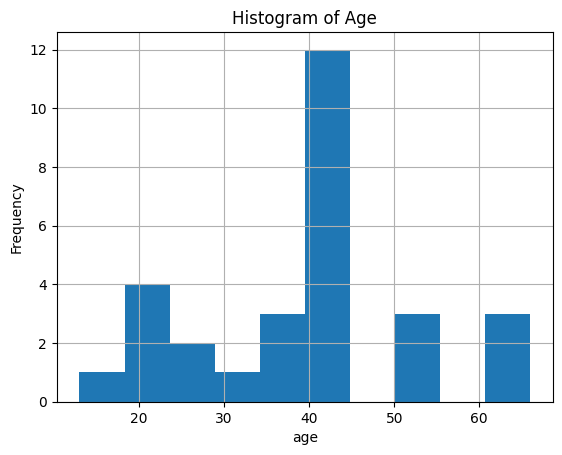

In [ ]:

import matplotlib.pyplot as plt


df['age'].hist()


plt.title('Histogram of Age')
plt.xlabel('age')
plt.ylabel('Frequency')


plt.show()


- Age 40 to 45 highly apply as per the data
- The distribution of data dosen't look normal  
